# E-Commerce Customer Churn

# Business Problem

## Background

Sebuah perusahaan E-Commerce ingin melakukan evaluasi terhadap pelanggan yang loyal dan pelanggan yang tidak lagi menggunakan layanan E-Commerce tersebut atau bisa kita sebut sebagai customer churn. Tentunya perusahaan tidak ingin kehilangan pelanggan loyal nya, karena hal tersebut dapat menyebabkan kerugian, sehingga perusahaan harus memberikan perlakuan khusus terhadap pelanggan yang loyal.

## Problem Statement

Pelanggan yang sudah loyal bukan tidak mungkin untuk meninggalkan layanan apabila memang ada pesaing baru yang lebih baik. Karena itu perusahaan harus bisa memberikan pelayanan yang bisa membuat pelanggan yang sudah loyal tidak berpaling ke layanan lainnya, agar perusahaan tidak mengalami kerugian.

## Goals

Berdasarkan permasalahan diatas, perusahaan ingin melakukan prediksi terhadap customer yang akan churn. Dengan memprediksi hal tersebut, perusahaan akan bisa memberi perlakuan yang tepat terhadap pelanggan yang sudah loyal maupun yang berpotensi untuk churn. Dengan begitu diharapkan perusahaan bisa mendapatkan profit yang lebih baik.

## Analytic Approach

Analitik yang dilakukan berupa evaluasi dan implementasi model klasifikasi untuk memprediksi pelanggan yang akan churn atau tidak berdasarkan data yang sudah ada.

## Metric Evaluation

0 : Pelanggan tidak churn

1 : Pelanggan Churn

Type 1 error : False Positive
Konsekuensi : Mengeluarkan uang yang sia-sia untuk pelanggan yang tidak akan churn

Type 2 error : False Negative
Konsekuensi : Kehilangan pelanggan yang sudah loyal

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

Data Source : https://drive.google.com/file/d/1Ipw3ZtQGEPTqkclBTmi_bA2Raor93UMr/view

In [2]:
df = pd.read_csv('EcomCustChurn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


* Didalam dataset ini terdapat 3941 baris data, dan 11 kolom.
* Dari 11 kolom tersebut terdapat 9 kolom numerik, dan 2 kolom kategorik.

**Kolom Numerik**:
- Tenure

Masa penggunaan pelanggan dalam bulan.
- WarehouseToHome

Jarak antara gudang dengan rumah pelanggan.
- NumberOfDeviceRegistered

Jumlah perangkat pelanggan yang terhubung ke pelayanan.
- SatisfactionScore

Tingkat kepuasan pelanggan terhadap pelayanan.
- NumberOfAddress

Jumlah alamat pelanggan yang terdaftar di pelayanan.
- Complain

Pengajuan komplain pelanggan ke pelayanan.
- DaySinceLastOrder

Hari sejak pemesanan terakhir oleh pelanggan.
- CashbackAmount

Rata-rata cashback bulan lalu.
- Churn

0 : Tidak churn, 1 : churn.

**Kolom Kategorik**:
- PreferedOrderCat

Kategori yang disukai oleh pelanggan.
- MaritalStatus

Status pernikahan pelanggan.

# Data Cleaning

In [3]:
# Cek kolom data
def Check (x):
    Type=[]
    Count=[]
    Sample=[]
    MissVal=[]
    for i in x.columns:
        Sample.append(x[i].unique()[:5])
        Count.append(x[i].nunique())
        Type.append(x[i].dtype)
        MissVal.append(x[i].isna().sum())
    check=pd.DataFrame({
        'Columns':df.columns,
        'Dtype':Type,
        'Nunique':Count,
        'Missing Value':MissVal,
        'Unique':Sample
    })
    return check

In [4]:
Check(df)

,Columns,Dtype,Nunique,Missing Value,Unique
0,Tenure,float64,36,194,"[15.0, 7.0, 27.0, 20.0, 30.0]"
1,WarehouseToHome,float64,33,169,"[29.0, 25.0, 13.0, 15.0, 16.0]"
2,NumberOfDeviceRegistered,int64,6,0,"[4, 3, 6, 2, 5]"
3,PreferedOrderCat,object,6,0,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,5,0,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3,0,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,14,0,"[2, 5, 7, 8, 3]"
7,Complain,int64,2,0,"[0, 1]"
8,DaySinceLastOrder,float64,22,213,"[7.0, nan, 8.0, 11.0, 2.0]"
9,CashbackAmount,float64,2335,0,"[143.32, 129.29, 168.54, 230.27, 322.17]"


In [5]:
# Cek jumlah per kategori yang ada di kolom PreferedOrderCat
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

Karena ada 2 jenis kategori yang sama yaitu Mobile & Mobile Phone, maka kedua kategori tersebut akan digabung menjadi satu.

In [6]:
# Menyatukan kategori Mobile & Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [7]:
# Cek data duplikat
df.duplicated().sum()

672

Karena tidak adanya **Customer ID** maka data dianggap benar duplikat. Langkah yang tepat adalah menghapus data duplikat karena bisa mempengaruhi model.

In [8]:
df.drop_duplicates(inplace=True)

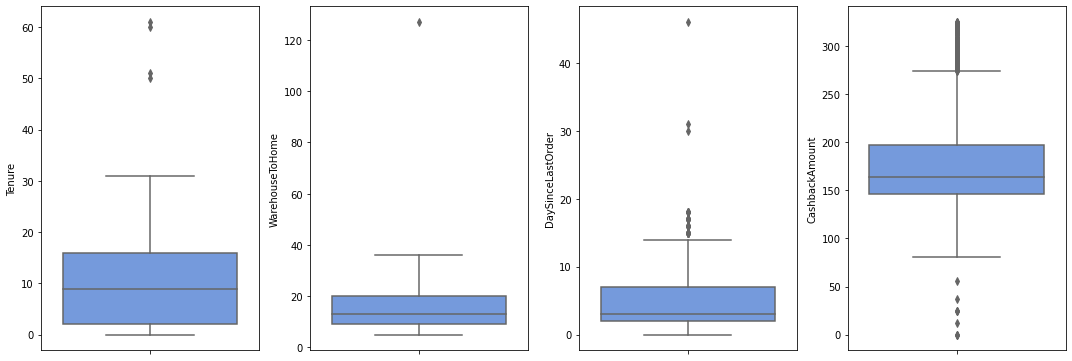

In [9]:
# Cek outlier menggunakan boxplot
features=['Tenure','WarehouseToHome', 'DaySinceLastOrder','CashbackAmount']
plt.figure(figsize=(15,20))
for i in range(0,len(features)):
  plt.subplot(4,4,i+1)
  sns.boxplot(y=df[features[i]],color='cornflowerblue',orient='v')
  plt.tight_layout()

In [10]:
for i in range(0, len(features)):
    Q1 = df[features[i]].quantile(0.25)
    Q3 = df[features[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =  Q1 - (1.5 * IQR)
    upper_bound =  Q3 + (1.5 * IQR)
    condition = (df[features[i]]< lower_bound) | (df[features[i]]> upper_bound)
    outlier = df.loc[condition, features[i]].count()
    PersentaseOutlier = outlier/df[features[i]].count()*100
    print(f'''Lower Bound {features[i]} adalah {round(lower_bound,2)}, dan Upper Bound {features[i]} adalah {round(upper_bound,2)} , terdapat {outlier} data yang menyimpang dari data biasanya, yaitu sebanyak {round(PersentaseOutlier,2)}%''')
    '/n'

Lower Bound Tenure adalah -19.0, dan Upper Bound Tenure adalah 37.0 , terdapat 4 data yang menyimpang dari data biasanya, yaitu sebanyak 0.13%
Lower Bound WarehouseToHome adalah -7.5, dan Upper Bound WarehouseToHome adalah 36.5 , terdapat 1 data yang menyimpang dari data biasanya, yaitu sebanyak 0.03%
Lower Bound DaySinceLastOrder adalah -5.5, dan Upper Bound DaySinceLastOrder adalah 14.5 , terdapat 40 data yang menyimpang dari data biasanya, yaitu sebanyak 1.3%
Lower Bound CashbackAmount adalah 69.04, dan Upper Bound CashbackAmount adalah 274.0 , terdapat 253 data yang menyimpang dari data biasanya, yaitu sebanyak 7.74%


Dari hasil diatas, data outlier pada kolom Tenure & WarehouseToHome akan di drop saja karena memiliki persentase yang kecil. Sedangkan outlier pada kolom DaySinceLastOrder & CashbackAmount akan dibiarkan saja karena memang wajar jika ada nilai yang tinggi.

In [11]:
# Menghapus outlier pada kolom Tenure & WarehouseToHome
df.drop(df[df['Tenure']>37].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)

# Data Analysis

In [12]:
# Perbandingan churn & tidak churn
df['Churn'].value_counts()

0    2731
1     533
Name: Churn, dtype: int64

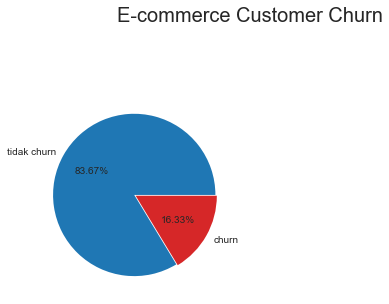

In [44]:
sns.color_palette('dark')
plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['tidak churn','churn'], colors= ['tab:blue','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.show()

Dari hasil data diatas dapat dilihat bahwa proporsi churn & tidak churn dengan persentase churn sebesar 16.33% sedangkan persentase tidak churn sebesar 83.67%.

## Melihat pengaruh masing-masing variabel terhadap churn

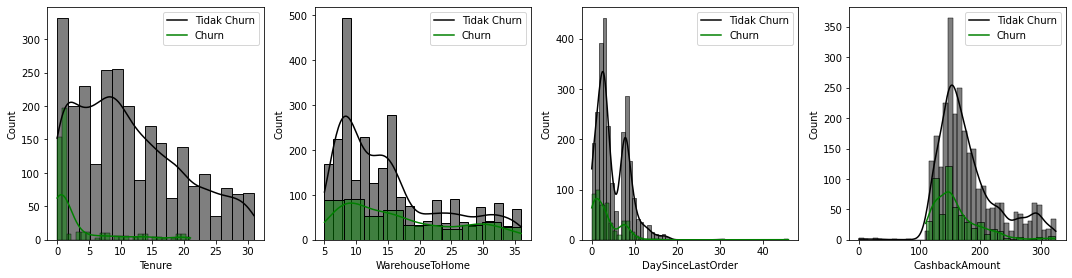

In [14]:
kunti=['Tenure','WarehouseToHome','DaySinceLastOrder','CashbackAmount']
a=1
sns.color_palette('pastel')
plt.figure(figsize=(15,15))
for i in kunti:
    plt.subplot(4,4,a)
    sns.histplot(x=df[df['Churn']==0][i],kde=True,color='black')
    sns.histplot(x=df[df['Churn']==1][i],kde=True,color='green')
    plt.legend(labels=['Tidak Churn','Churn'])
    plt.tight_layout()
    a+=1
plt.show()

* Tenure terhadap churn :
Dari grafik diatas dapat dilihat bahwa, semakin lama pelanggan menggunakan layanan maka semakin besar juga seorang pelanggan untuk tidak churn.

* WarehouseToHome terhadap churn :
Data WarehouseToHome terdistribusi hampir merata, namun sedikit yang melebihi angka 20. Sehingga bisa disimpulkan bahwa semakin jauh jarak akan mempengaruhi pelanggan churn.

* DaySinceLastOrder terhadap churn :
Dari grafik diatas menunjukan bahwa, data churn dan yang tidak churn terdistribusi hampir sama.

* CashbackAmount :
Dari grafik diatas menunjukan bahwa, pelanggan yang churn berada pada kisaran 140-150.

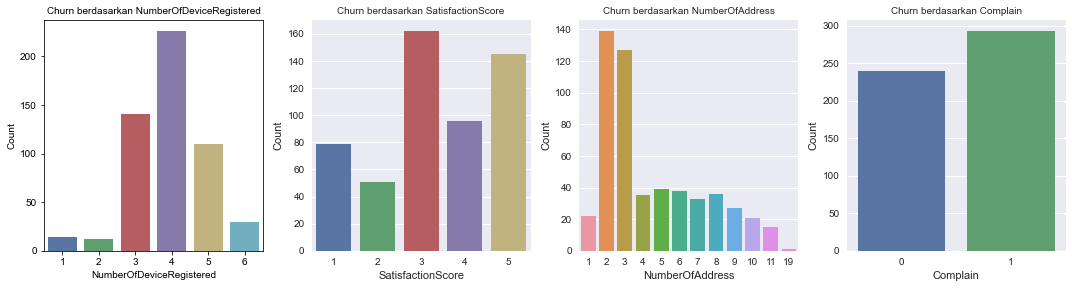

In [15]:
kolnum=['NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain']
a=1
plt.figure(figsize=(15,15))
for i in kolnum:  
    plt.subplot(4,4,a)
    plt.style.use('seaborn')
    sns.countplot(x=df[df['Churn']==1][i])
    plt.title(f'Churn berdasarkan {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

* Churn berdasarkan NumberOfDeviceRegistered :
Pelanggan churn paling tinggi berada di 3-4 device yang terdaftar dalam pelayanan.

* Churn berdasarkan SatisfactionScore :
Pelanggan churn paling tinggi yang memberikan nilai kepuasan di angka 3.

* Churn berdasarkan NumberOfAddress :
Pelanggan churn paling tinggi adalah yang memiliki 2-3 alamat yang terdaftar dalam pelayanan.

* Churn berdasarkan Complain :
Pelanggan yang churn cenderung melakukan komplain terhadap pelayanan.

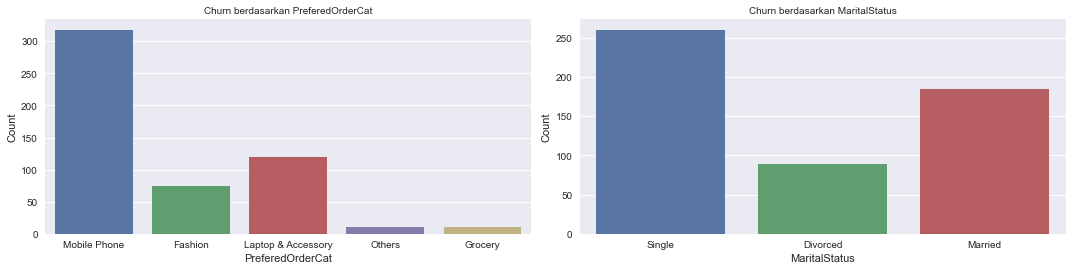

In [16]:
kategorik=['PreferedOrderCat','MaritalStatus']
plt.figure(figsize=(15,7))
a=1
for i in kategorik:  
    plt.subplot(2,2,a)
    plt.style.use('seaborn')
    sns.countplot(x=df[df['Churn']==1][i])
    plt.title(f'Churn berdasarkan {i}', fontsize=10)
    plt.ylabel('Count')
    a+=1
    plt.tight_layout()
plt.show()

* Pelanggan yang churn tertinggi ada pada kategori Mobile Phone.
* Pelanggan yang churn tertinggi dengan status masih Single.

# Data Preprocessing

## Data Spliting

* Feature : Tenure, WarehouseToHome, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount
* Target : Churn

In [17]:
# Binning
bin=['Sangat Kecil','Kecil','Sedang','Besar','Sangat Besar']
df['CashbackAmountClass']=pd.cut(df['CashbackAmount'],5,labels=bin)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CashbackAmountClass
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,Sedang
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0,Kecil
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Sedang
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,Besar
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Sangat Besar


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop(columns='Churn')
y=df['Churn']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=1994)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [22]:
# Mengisi missing value
country_pipe=Pipeline([
    ('impute',SimpleImputer(strategy='mean')),
    ('binary',ce.BinaryEncoder())
])

In [23]:
# Encoding
ordinal=[
    {'col':'CashbackAmountClass',
    'mapping':{
        'Sangat Kecil' : 0,
        'Kecil': 1, 
        'Sedang': 2, 
        'Besar' : 3, 
        'Sangat Besar' : 4, 
    }}
]

In [24]:
transformer=ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'),['NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','Complain']),
    ('pipeline',country_pipe,['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder','CashbackAmount']),
    ('ordinal',ce.OrdinalEncoder(mapping=ordinal),['CashbackAmountClass'])
],remainder='passthrough')

# Modeling

In [25]:
#Library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from xgboost.sklearn import XGBClassifier

In [26]:
logreg=LogisticRegression(max_iter=50,random_state=1994)
tree=DecisionTreeClassifier(max_depth=3,random_state=1994)
knn=KNeighborsClassifier(n_neighbors=3)
rf=RandomForestClassifier(max_depth=3,random_state=1994)
xgb=XGBClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,random_state=1994)
ada=AdaBoostClassifier(tree,n_estimators=50,learning_rate=0.1,random_state=1994)
gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,random_state=1994)

# Model Selection

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [28]:
models=[logreg,tree,knn,rf,xgb,ada,gbc]
score=[]
rata=[]
std=[]
for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('processing',transformer),
        ('model',i)
    ])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

In [29]:
pd.DataFrame({
    'model':['logreg','tree','knn','rf','xgb','ada','gbc'],
    'mean':rata,
    'std':std
})

,model,mean,std
0,logreg,0.533443,0.048100
1,tree,0.602281,0.036308
2,knn,0.417249,0.030400
3,rf,0.121833,0.035731
4,xgb,0.595152,0.034188
5,ada,0.603614,0.036979
6,gbc,0.624256,0.039548


Hasil diatas menunjukan bahwa dua model terbaik adalah GBC & Adaboost. Kedua model tersebut akan kita jadikan sebagai benchmark model.

# Test Model

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
model={
    'ada':AdaBoostClassifier(tree,n_estimators=50,learning_rate=0.1,random_state=1994),
    'gbc':GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,random_state=1994)
}

In [32]:
for i,j in model.items():
    estimator=Pipeline([
    ('processing',transformer),
    ('model',j)
    ])
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    print(i)
    print(classification_report(y_test,y_pred))

ada
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       546
           1       0.73      0.50      0.59       107

    accuracy                           0.89       653
   macro avg       0.82      0.73      0.76       653
weighted avg       0.88      0.89      0.88       653

gbc
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       546
           1       0.73      0.49      0.58       107

    accuracy                           0.89       653
   macro avg       0.82      0.73      0.76       653
weighted avg       0.88      0.89      0.88       653



# Tuning

In [33]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [34]:
ada=AdaBoostClassifier(tree,n_estimators=50,learning_rate=0.1,random_state=1994)
gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,random_state=1994)

In [35]:
tunning_models=[xgb,gbc]
for model in tunning_models: 
    estimator=Pipeline([
        ('processing',transformer),
        ('model',model)
])

In [36]:
hyperparam=[
    {'model':[ada],
    'model__learning_rate':[0.1],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[200]},
    {'model':[ada],
    'model__learning_rate':[0.01],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[500]},
    {'model':[ada],
    'model__learning_rate':[0.001],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[1000]},
     {'model':[gbc],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.01],
    'model__n_estimators':[500],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.001],
    'model__n_estimators':[1000],
    'model__max_depth':[1,2,3,4,5]},
    
]

In [37]:
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator,
                 param_grid=hyperparam,
                 cv=skfold,
                 scoring='f1',
                 n_jobs=-1)

In [38]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['NumberOfDeviceRegistered',
                                                                          'PreferedOrderCat',
                                                                          'SatisfactionScore',
                                                                          'MaritalStatus',
                                                                          'Complain']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          Simple...
                         {'model': [GradientBoostingClassifier(max_depth=4,
                                                               n_estimators=200,
                                                               random_state=1994)],
                          'model__learning_rate': [0.01],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [500]},
                         {'model': [GradientBoostingClassifier(max_depth=4,
                                                               n_estimators=200,
                                                               random_state=1994)],
                          'model__learning_rate': [0.001],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [1000]}],
             scoring='f1')

In [39]:
grid.best_params_, grid.best_score_

({'model': GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=1994),
  'model__learning_rate': 0.1,
  'model__max_depth': 4,
  'model__n_estimators': 200},
 0.7125967710193174)

Hasil tersebut menunjukan model terbaik adalah GBC.

# Before vs After Tuning

In [40]:
# Before Tuning
gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,random_state=1994)
estimator=Pipeline([
    ('processing',transformer),
    ('model',gbc)
])
estimator.fit(x_train,y_train)
y_pred_before=estimator.predict(x_test)
print(classification_report(y_test,y_pred_before))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93       546
           1       0.73      0.49      0.58       107

    accuracy                           0.89       653
   macro avg       0.82      0.73      0.76       653
weighted avg       0.88      0.89      0.88       653



In [41]:
# After Tuning
best_model=grid.best_estimator_
best_model.fit(x_train,y_train)
y_pred_after=best_model.predict(x_test)
print(classification_report(y_test,y_pred_after))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       546
           1       0.68      0.60      0.64       107

    accuracy                           0.89       653
   macro avg       0.80      0.77      0.79       653
weighted avg       0.88      0.89      0.89       653



Perbandingan before vs after pada model menunjukan bahwa nilai F1 Score sebelum tuning sebesar 0.58, dan hasil setelah tuning sebesar 0.64, nilai F1 Score setelah tuning meningkat sebesar 6%.

# Feature Importances

In [64]:
best_model

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['NumberOfDeviceRegistered',
                                                   'PreferedOrderCat',
                                                   'SatisfactionScore',
                                                   'MaritalStatus',
                                                   'Complain']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                           'mapping': {'Besar': 3,
                                                                                       'Kecil': 1,
                                                                                       'Sangat Besar': 4,
                                                                                       'Sangat Kecil': 0,
                                                                                       'Sedang': 2}}]),
                                                  ['CashbackAmountClass'])])),
                ('model',
                 GradientBoostingClassifier(max_depth=4, n_estimators=200,
                                            random_state=1994))])

In [192]:
features=list(best_model[0].transformers_[0][1].get_feature_names_out())+(best_model[0].transformers_[2][1].get_feature_names())+best_model[0].transformers_[1][2]

In [72]:
features

['NumberOfDeviceRegistered_2',
 'NumberOfDeviceRegistered_3',
 'NumberOfDeviceRegistered_4',
 'NumberOfDeviceRegistered_5',
 'NumberOfDeviceRegistered_6',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'SatisfactionScore_2',
 'SatisfactionScore_3',
 'SatisfactionScore_4',
 'SatisfactionScore_5',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Complain_1',
 'CashbackAmountClass']

In [193]:
pd.DataFrame({'important':best_model[1].feature_importances_},index=features).sort_values('important',ascending=False).head(3)

,important
CashbackAmountClass,0.355307
DaySinceLastOrder,0.179732
Complain_1,0.112833


<AxesSubplot:>

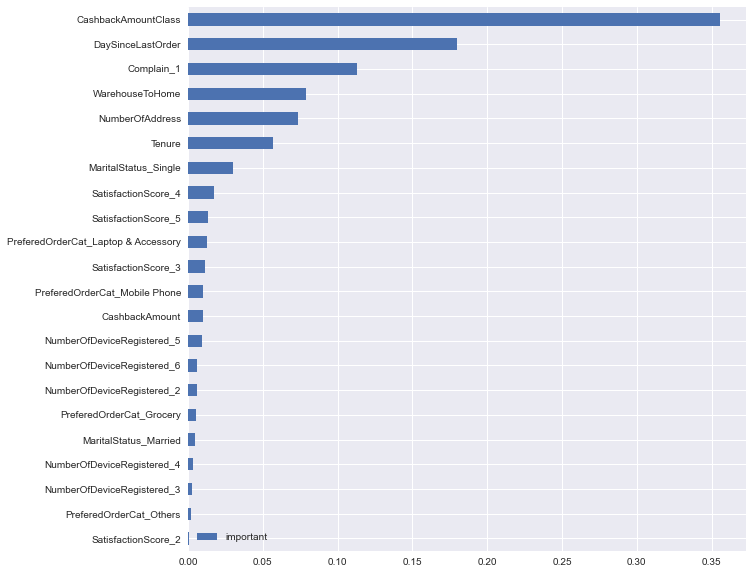

In [197]:
pd.DataFrame({'important':best_model[1].feature_importances_},index=features).sort_values('important',ascending=True).plot(kind='barh',figsize=(10,10))

# Conclusion

In [42]:
report_tuned=(classification_report(y_test,y_pred_after))

In [45]:
print('Classification Report Tuned GradientBoost : \n', report_tuned)

Classification Report Tuned GradientBoost : 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       546
           1       0.68      0.60      0.64       107

    accuracy                           0.89       653
   macro avg       0.80      0.77      0.79       653
weighted avg       0.88      0.89      0.89       653



- Hasil prediksi menggunakan model yang sudah dibuat, dapat dilihat bahwa pelanggan yang tidak churn sebesar 93% berdasarkan nilai dari F1 score, sedangkan sebesar 60% pelanggan yang akan churn berdasarkan nilai recall, dan model kemungkinan bisa memprediksi benar untuk pelanggan yang akan churn sebesar 68% berdasarkan nilai precision.

- Dengan dilakukannya prediksi menggunakan model yang sudah dibuat, diharapkan perusahaan dapat memberikan perlakuan yang sesuai terhadap pelanggan, dan melakukan strategi pemasaran yang tepat.

# Recommendation

- Memberikan berbagai macam penawaran khusus kepada pelanggan dengan masa tenure yang relatif sebentar yang berpotensi churn, berupa promo khusus untuk pengguna baru, cashback, sehingga dapat menarik pelanggan untuk tetap menggunakan layanan e-commerce tersebut. 
- Komplain yang dilakukan oleh pelanggan harus lebih diperhatikan lagi, dan secepatnya mengambil tindakan untuk komplain tersebut.
- Meningkatkan pelayanan dari segala aspek, contohnya seperti kemudahan dalam penggunaan platform e-commerce, memperbanyak variasi produk, mengoptimalkan live chat atau customer service, memberi pelatihan kepada marketplace yang terdaftar sehingga dapat memberikan pelayanan dan produk yang memuaskan.
- Memberikan diskon untuk ongkos kirim sampai gratis ongkos kirim kepada pelanggan yang akan churn yang memiliki jarak antar warehouse dan rumah pelanggan yang jauh.
- Menggunakan model machine learning yang telah dibuat sebagai solusi untuk menentukan strategi pemasaran yang tepat sasaran.

In [198]:
import pickle

In [199]:
best_model.fit(x,y)

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['NumberOfDeviceRegistered',
                                                   'PreferedOrderCat',
                                                   'SatisfactionScore',
                                                   'MaritalStatus',
                                                   'Complain']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'CashbackAmountClass',
                                                                           'mapping': {'Besar': 3,
                                                                                       'Kecil': 1,
                                                                                       'Sangat Besar': 4,
                                                                                       'Sangat Kecil': 0,
                                                                                       'Sedang': 2}}]),
                                                  ['CashbackAmountClass'])])),
                ('model',
                 GradientBoostingClassifier(max_depth=4, n_estimators=200,
                                            random_state=1994))])

In [200]:
pickle.dump(best_model,open('best_modelGBC.sav','wb'))